# Question 1

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import warnings
warnings.filterwarnings("ignore")


In [2]:
# read in the data for the assignment which is the attached housing data
df_train = pd.read_excel('/content/Asssignment4_Data.xlsx', sheet_name='Train')
df_test = pd.read_excel('/content/Asssignment4_Data.xlsx', sheet_name='Test')

In [3]:
df_train

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,Apartment
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,House
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,Condo
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,Apartment
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,Apartment
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,Condo
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,Condo
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,House
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,Condo
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,Apartment


In [4]:
# section out the data into the X and Y, training and testing data
X_traind = df_train.drop(['House ID', 'Construction type'], axis=1)
y_traind = df_train['Construction type']
X_testd = df_test.drop(['House ID', 'Construction type'], axis=1)
y_testd = df_test['Construction type']

In [5]:
# scaling the data becasue the distributions are different across the variables
from sklearn.preprocessing import LabelEncoder

X_train = np.array(X_traind)
X_test = np.array(X_testd)

# encoding the target variables
le = LabelEncoder()
le = le.fit(y_traind)
y_train = le.transform(y_traind)
y_test = le.transform(y_testd)

In [6]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [7]:
# making predictions on the testing set
y_pred = gnb.predict(X_test)

In [8]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Model accuracy : " + str(metrics.accuracy_score(y_test, y_pred)*100) + "%")

Model accuracy : 20.0%


# Question 2

In [9]:
# import the package for the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

1. Using the default parameters

In [10]:
# constructing model using the default parameters
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [11]:
# getting accuracy of the training set
train_pred = model.predict(X_train)
accuracy_score(train_pred, y_train)
print('Training Set')
print('------------')
print('Accuracy: {}\n'.format(accuracy_score(train_pred, y_train)))

# getting accuracy on the test set
y_pred = model.predict(X_test)
print('Testing Set')
print('------------')
print('Accuracy: {}\n'.format(accuracy_score(y_pred, y_test)))

Training Set
------------
Accuracy: 1.0

Testing Set
------------
Accuracy: 0.4



2. Effect of restricting the maximum depth of the tree

In [12]:
# creating a list of values for the maximum depth
accuracy_val = []
accuracy_tra = []

# mapping the values to the classifier model
for i in range(1, 7):
    model = DecisionTreeClassifier(max_depth=i)
    model = model.fit(X_train, y_train)
    tra = accuracy_score(model.predict(X_train), y_train)
    accuracy_tra.append(tra)
    acc = accuracy_score(model.predict(X_test), y_test)
    accuracy_val.append(acc)

In [13]:
accuracy_tra

[0.55, 0.75, 0.9, 0.95, 1.0, 1.0]

In [14]:
accuracy_val

[0.4, 0.6, 0.4, 0.4, 0.4, 0.4]

The best value for the depth of the classifier model will be at a max_depth of 2

3. Restricting the tree depth has a strong effect on the classifier performance because it prevents the model from over fitting to the data in this sensee. For this model with this very small dataset, the model is prone to creating an explanation for all the possible outcomes of the training data. This is limited by introducing the restriction of the tree depth and hence the classifier performance improves.

In [15]:
from sklearn import tree

# constructing model using the default parameters
model = DecisionTreeClassifier(max_depth=2)
model = model.fit(X_train, y_train)

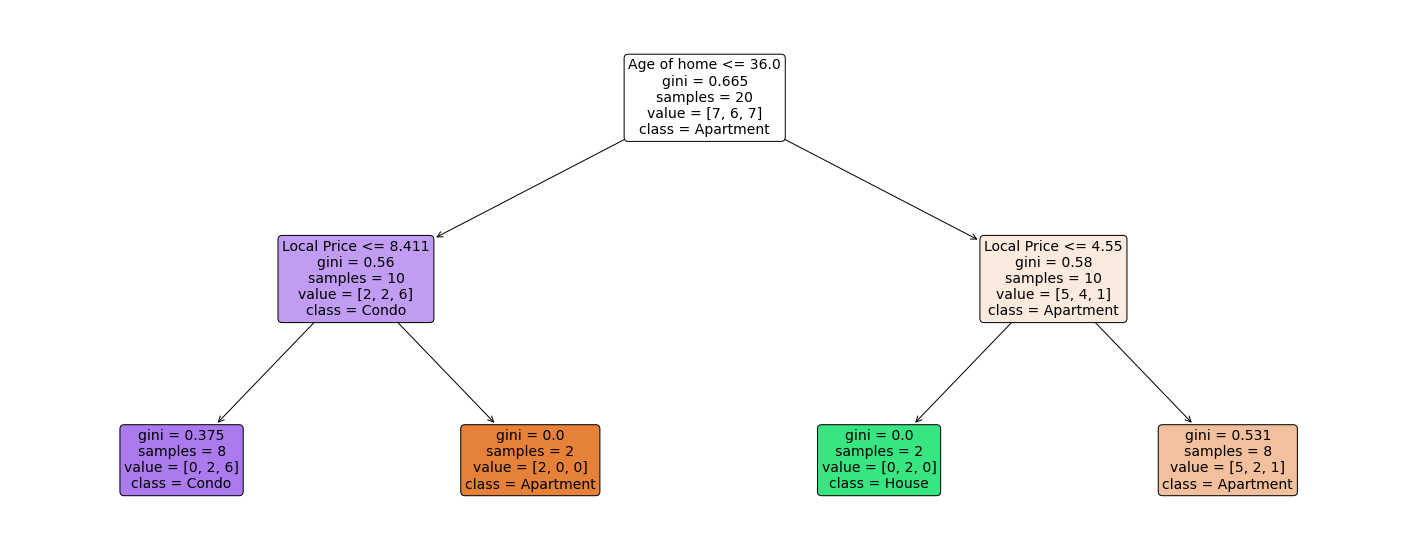

In [16]:
plt.figure(figsize=(25,10))
a = tree.plot_tree(model, 
              feature_names=X_traind.columns, 
              class_names=y_traind, 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [17]:
print(tree.export_text(model))

|--- feature_7 <= 36.00
|   |--- feature_0 <= 8.41
|   |   |--- class: 2
|   |--- feature_0 >  8.41
|   |   |--- class: 0
|--- feature_7 >  36.00
|   |--- feature_0 <= 4.55
|   |   |--- class: 1
|   |--- feature_0 >  4.55
|   |   |--- class: 0



4. In this example. since the data was not so much to break down all the variables and utilize them in the model. Considering this the model using the example would result in the `Apartment` class. The path is that since the age of home is 23, its less than 36 so it goes to the left and the local price is also greater than 8.411, so that makes it belong to the Apartment class.

# Question 3

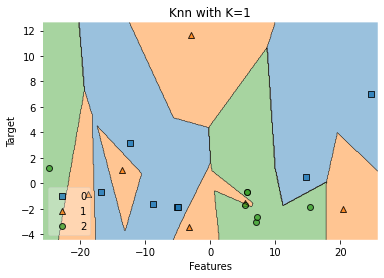

Accuracy for k-value of 1 in KNN is 0.2


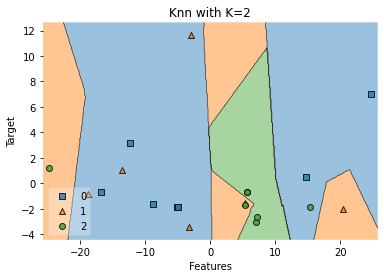

Accuracy for k-value of 2 in KNN is 0.2


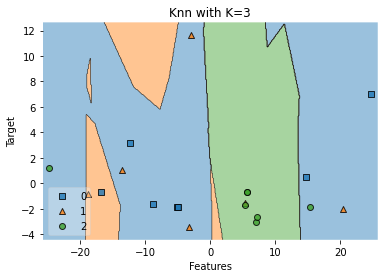

Accuracy for k-value of 3 in KNN is 0.2


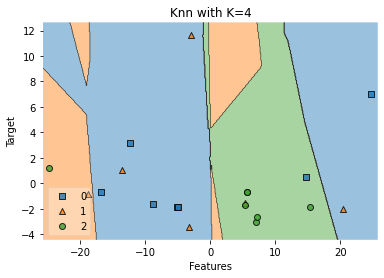

Accuracy for k-value of 4 in KNN is 0.2


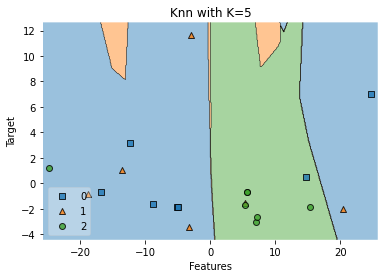

Accuracy for k-value of 5 in KNN is 0.2


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

# since the KNN can plot for 2 variables, we will use the PCA to shrink the features
pca = PCA(n_components=2)
X_train2 = pca.fit(X_traind)
X_train2 = pca.transform(X_traind)
X_test2 = pca.transform(X_testd)

accs = []
k = [1, 2, 3, 4, 5]
for i in k:
    # model fitting
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train2, y_train)
    
    # Accuracy calculation
    y_pred = knn.predict(X_test2)
    num = accuracy_score(y_test, y_pred)
    accs.append(num)
    
    # KNN plot
    # Plotting decision region
    plot_decision_regions(X_train2, y_train, clf=knn, legend=3)
    # Adding axes annotations
    plt.xlabel('Features')
    plt.ylabel('Target')
    plt.title('Knn with K='+ str(i))
    plt.show()
    
    # Accuracy
    print("Accuracy for k-value of {} in KNN is {}".format(i, num))


I truly believe that the data points are not enough to properly make these plots and distinctions.